In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(style="white", color_codes=True, font_scale=1.5)
sns.set_palette("Set2")
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import rc
from matplotlib.ticker import LinearLocator
from matplotlib.ticker import FormatStrFormatter
rc('text', usetex=True)
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
from itertools import cycle

In [31]:
df = pd.read_csv("coverage.5k.csv")
df.loc[df["method"] == "svgd", "method"] = "MSVGD"
df.loc[df["method"] == "svmd", "method"] = "SVMD"
df.loc[df["method"] == "default", "method"] = "Standard"
df.loc[df["method"] == "proj_svgd", "method"] = "Projected SVGD"

In [32]:
df

,Unnamed: 0,target,method,covered,width
0,0,0.80,Standard,1.0,8.438869
1,1,0.80,Standard,1.0,7.993661
2,2,0.85,Standard,1.0,8.115382
3,3,0.85,Standard,1.0,7.993694
4,4,0.90,Standard,1.0,8.438836
...,...,...,...,...,...
11749,11749,0.99,SVMD,1.0,7.833749
11750,11750,0.99,SVMD,1.0,9.855841
11751,11751,0.99,SVMD,1.0,8.440989
11752,11752,0.99,SVMD,1.0,7.930368


In [33]:
target_coverages = np.array(sorted(set(df["target"].values)))
# methods = list(set(df["method"].values))
methods = ["Standard", "MSVGD", "SVMD"] # "Projected SVGD"

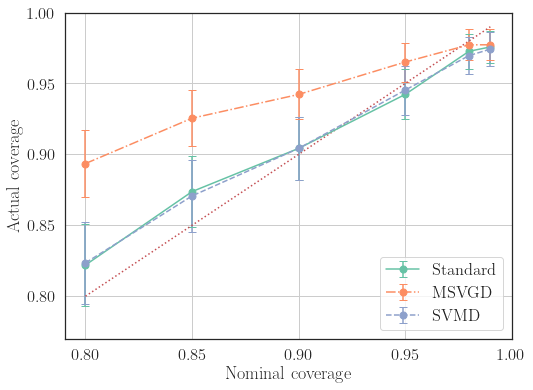

In [34]:
def ci(df, method, z=1.96):
    means = []
    errs = []
    for target in target_coverages:
        covered = df.loc[(df["target"] == target) & (df["method"] == method), "covered"].values
        ns = covered.sum()
        n = covered.shape[0]
        means.append((ns + 0.5 * z**2) / (n + z**2))
        errs.append(z / (n + z**2) * np.sqrt(ns * (n - ns) / n + z**2 / 4.))
    return means, errs

plt.figure(figsize=(8, 6))
lines = ["-","-.","--"]
linecycler = cycle(lines)
# sns.lineplot(data=df_melt, x="target", y="covered", hue="method", ci=95, err_style='bars')
for i, method in enumerate(methods):
    linestyle = next(linecycler)
    # if method == "default":
    means, errors = ci(df, method)
    # plt.errorbar(target_coverages + (i - 1) * 0.002, means, yerr=errors, label=method)
    plt.errorbar(target_coverages, means, yerr=errors, ls=linestyle, label=method, marker=".", ms=14, capsize=4, capthick=1)
plt.plot(target_coverages, target_coverages, ":", c="r")
plt.xticks(np.linspace(0.8, 1, 5))
plt.yticks(np.linspace(0.8, 1, 5))
plt.grid(True)
plt.xlabel("Nominal coverage")
plt.ylabel("Actual coverage")
plt.legend()
plt.ylim(ymin=0.77, ymax=1)
plt.savefig("coverage.pdf", bbox_inches="tight", dpi=150)

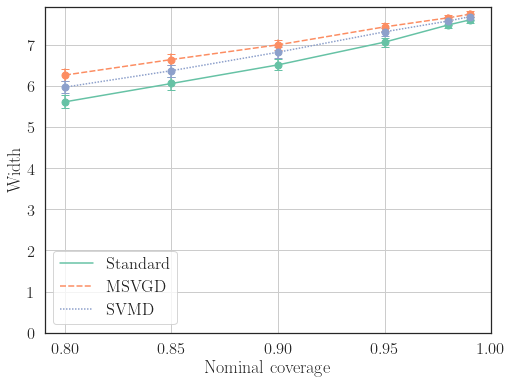

In [69]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x="target", y="width", style="method", hue="method", ci=95, err_style='bars', err_kws=dict(marker=".", ms=14, capsize=4, capthick=1))
plt.xticks(np.linspace(0.8, 1, 5))
plt.xlabel("Nominal coverage")
plt.ylabel("Width")
plt.ylim(ymin=0)
plt.grid(True)
plt.legend()
plt.savefig("width.pdf", bbox_inches="tight", dpi=150)

In [36]:
# # eigen_thresholds = [98, 985, 99, 995, 1]
# eigen_thresholds = [98, 985, 99, 1]
# dfs = []
# for eigen_threshold in eigen_thresholds:
#     filename = "coverage.s4.{}.2k.csv".format(eigen_threshold)
#     df_svmd = pd.read_csv(filename)
#     df_svmd.loc[df_svmd["method"] == "svgd", "method"] = "SVGD"
#     df_svmd.loc[df_svmd["method"] == "svmd", "method"] = "SVMD"
#     df_svmd = df_svmd[df_svmd["method"] == "SVMD"]
#     df_svmd["eigen_threshold"] = eigen_threshold
#     dfs.append(df_svmd)
# df_svmd = pd.concat(dfs)


In [37]:
# plt.figure(figsize=(8, 6))
# def svmd_ci(df_svmd, eigen_threshold, z=1.96):
#     means = []
#     errs = []
#     for target in target_coverages:
#         covered = df_svmd.loc[(df_svmd["target"] == target) & (df_svmd["eigen_threshold"] == eigen_threshold), "covered"].values
#         ns = covered.sum()
#         n = covered.shape[0]
#         means.append((ns + 0.5 * z**2) / (n + z**2))
#         errs.append(z / (n + z**2) * np.sqrt(ns * (n - ns) / n + z**2 / 4.))
#     return means, errs
# for eigen_threshold in eigen_thresholds:
#     means, errors = svmd_ci(df_svmd, eigen_threshold)
#     plt.errorbar(target_coverages, means, yerr=errors, label="svmd " + str(eigen_threshold), marker=".", ms=14, capsize=4, capthick=1)
# for method in ["MSVGD", "default"]:
#     means, errors = ci(df, method)
#     plt.errorbar(target_coverages, means, yerr=errors, label=method, marker=".", ms=14, capsize=4, capthick=1)
# plt.plot(target_coverages, target_coverages, "--", c="r")
# plt.xticks(np.linspace(0.8, 1, 5))
# plt.yticks(np.linspace(0.8, 1, 5))
# plt.grid(True)
# plt.xlabel("nominal coverage")
# plt.ylabel("actual coverage")
# plt.legend()
# plt.ylim(bottom=0.77)
# # plt.savefig("coverage.pdf", bbox_inches="tight", dpi=150)

In [38]:
df_wrt_k = pd.read_csv("coverage_wrt_k.csv")
# df_wrt_k = pd.read_csv("hiv_cov_wrt_k.csv")
df_wrt_k.loc[df_wrt_k["method"] == "svgd", "method"] = "MSVGD"
df_wrt_k.loc[df_wrt_k["method"] == "svmd", "method"] = "SVMD"
df_wrt_k.loc[df_wrt_k["method"] == "default", "method"] = "Standard"
df_wrt_k.loc[df_wrt_k["method"] == "proj_svgd", "method"] = "Projected SVGD"

In [39]:
df_wrt_k

,Unnamed: 0,target,method,n_samples,covered,width
0,0,0.9,Standard,500,0.0,6.041965
1,1,0.9,Standard,500,1.0,6.316654
2,2,0.9,Standard,1000,1.0,6.841915
3,3,0.9,Standard,1000,1.0,6.316606
4,4,0.9,Standard,1500,1.0,6.841930
...,...,...,...,...,...,...
29119,29119,0.9,SVMD,2000,1.0,6.238697
29120,29120,0.9,SVMD,2500,1.0,7.722316
29121,29121,0.9,SVMD,2500,1.0,6.746181
29122,29122,0.9,SVMD,3000,1.0,6.600501


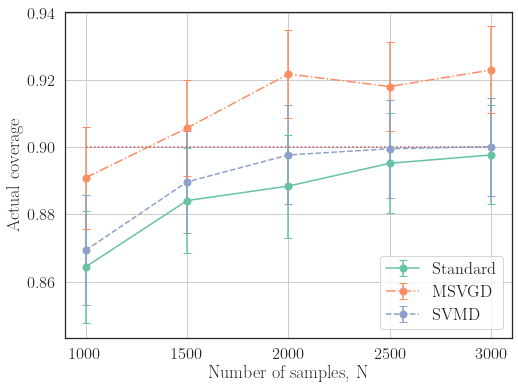

In [40]:
k_list = [1000, 1500, 2000, 2500, 3000]

def ci_wrt_k(df, method, z=1.96):
    means = []
    errs = []
    for n_samples in k_list:
        covered = df.loc[(df["n_samples"] == n_samples) & (df["method"] == method), "covered"].values
        ns = covered.sum()
        n = covered.shape[0]
        means.append((ns + 0.5 * z**2) / (n + z**2))
        errs.append(z / (n + z**2) * np.sqrt(ns * (n - ns) / n + z**2 / 4.))
    return means, errs

plt.figure(figsize=(8, 6))
lines = ["-","-.","--"]
linecycler = cycle(lines)
# sns.lineplot(data=df_wrt_k, x="n_samples", y="covered", hue="method", ci=95, err_style='bars')
for i, method in enumerate(methods):
    # if method == "default":
    means, errors = ci_wrt_k(df_wrt_k, method)
    linestyle = next(linecycler)
    plt.errorbar(k_list, means, yerr=errors, ls=linestyle, label=method, marker=".", ms=14, capsize=4, capthick=1)
plt.plot(k_list, [0.9] * len(k_list), ":", c="r")
plt.xticks(k_list)
# plt.yticks(np.linspace(0.8, 1, 5))
plt.grid(True)
plt.xlabel("Number of samples, N")
plt.ylabel("Actual coverage")
plt.legend()
# plt.ylim(bottom=0.77)
plt.savefig("coverage_wrt_k.pdf", bbox_inches="tight", dpi=150)

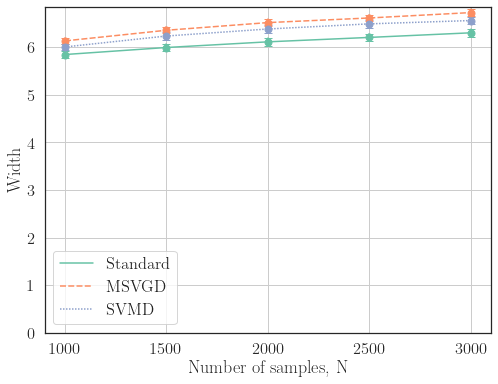

In [70]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=df_wrt_k.loc[df_wrt_k["n_samples"]>500], x="n_samples", y="width", style="method", hue="method", ci=95, err_style='bars', err_kws=dict(marker=".", ms=14, capsize=4, capthick=1))
plt.xticks(k_list)
plt.xlabel("Number of samples, N")
plt.ylabel("Width")
plt.ylim(ymin=0)
plt.grid(True)
plt.legend()
plt.savefig("width_wrt_k.pdf", bbox_inches="tight", dpi=150)

In [42]:
datafile = "http://hivdb.stanford.edu/pages/published_analysis/genophenoPNAS2006/DATA/NRTI_DATA.txt"
NRTI = pd.read_table(datafile, na_values="NA")

In [43]:
NRTI

,IsolateName,PseudoName,MedlineID,3TC,ABC,AZT,D4T,DDI,TDF,P1,...,P231,P232,P233,P234,P235,P236,P237,P238,P239,P240
0,883-3,CA596,10610625.0,200.0,8.4,59.0,5.4,3.3,1.7,-,...,-,-,-,-,-,-,-,-,-,-
1,CA10474,CA606,10839657.0,200.0,8.6,10.4,1.7,1.9,NaN,-,...,-,-,-,-,-,-,-,-,-,-
2,1617-1,CA624,14615657.0,200.0,20.0,261.0,11.0,23.0,2.4,-,...,-,-,-,-,-,-,-,-,-,-
3,CA16894,CA628,15995959.0,1.6,2.6,222.0,2.6,0.9,1.8,-,...,-,-,-,-,-,-,-,-,-,-
4,4755-5,CA632,14615657.0,200.0,7.7,61.0,3.9,2.4,2.3,-,...,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,CA63854,CA060015,NaN,200.0,6.7,9.7,1.9,1.7,1.4,-,...,-,-,-,-,-,-,-,-,-,-
635,CA63858,CA060017,NaN,2.4,2.1,25.0,2.0,1.3,2.0,-,...,-,-,-,-,-,-,-,-,-,-
636,CA63860,CA060018,NaN,200.0,12.0,58.0,3.2,2.4,1.6,-,...,-,-,-,-,-,-,-,-,-,-
637,CA63862,WA050001,NaN,2.7,2.1,5.7,1.6,1.2,1.4,-,...,-,-,-,-,-,-,-,-,-,-


In [44]:
np.unique(NRTI["P1"])

array(['-', '.', 'H', 'L', 'SP', 'TP'], dtype=object)

In [45]:
NRTI_specific = []
NRTI_muts = []
for i in range(1,241):
    d = NRTI['P%d' % i]
    for mut in np.unique(d):
        if mut not in ['-','.'] and len(mut) == 1:
            test = np.equal(d, mut)
            if test.sum() >= 11:
                NRTI_specific.append(np.array(np.equal(d, mut))) 
                NRTI_muts.append("P%d%s" % (i,mut))

In [46]:
print(len(NRTI_specific))
len(NRTI_muts)
print(NRTI_muts)

91
['P6D', 'P20R', 'P21I', 'P35I', 'P35M', 'P35T', 'P39A', 'P41L', 'P43E', 'P43N', 'P43Q', 'P44D', 'P48T', 'P49R', 'P60I', 'P62V', 'P65R', 'P67G', 'P67N', 'P68G', 'P69D', 'P69N', 'P69i', 'P70R', 'P74I', 'P74V', 'P75I', 'P75M', 'P75T', 'P77L', 'P83K', 'P90I', 'P98G', 'P98S', 'P100I', 'P101E', 'P102Q', 'P103N', 'P103R', 'P108I', 'P115F', 'P116Y', 'P118I', 'P121H', 'P122E', 'P122P', 'P123E', 'P123N', 'P135L', 'P135M', 'P135T', 'P135V', 'P142V', 'P151M', 'P158S', 'P162A', 'P162C', 'P162D', 'P166R', 'P169D', 'P174H', 'P174K', 'P177E', 'P178L', 'P178M', 'P179I', 'P181C', 'P184V', 'P190A', 'P196E', 'P200A', 'P200I', 'P202V', 'P203D', 'P203K', 'P207E', 'P208Y', 'P210W', 'P211K', 'P214L', 'P215F', 'P215Y', 'P218E', 'P219E', 'P219N', 'P219Q', 'P219R', 'P221Y', 'P223Q', 'P228H', 'P228R']


In [47]:
NRTI_specific = NRTI.from_records(np.array(NRTI_specific).T, columns=NRTI_muts)

In [48]:
NRTI_specific

,P6D,P20R,P21I,P35I,P35M,P35T,P39A,P41L,P43E,P43N,...,P215Y,P218E,P219E,P219N,P219Q,P219R,P221Y,P223Q,P228H,P228R
0,False,False,False,False,False,False,False,True,True,False,...,True,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,True,False,False,False,True,False,True,...,True,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,True,False,False,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,False,True,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
635,False,True,False,False,False,True,False,True,False,False,...,True,False,False,False,False,True,False,False,False,False
636,False,True,False,True,False,False,False,True,False,True,...,True,False,False,False,False,False,False,False,False,False
637,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [49]:
Y = NRTI["3TC"]
Y

0      200.0
1      200.0
2      200.0
3        1.6
4      200.0
       ...  
634    200.0
635      2.4
636    200.0
637      2.7
638    200.0
Name: 3TC, Length: 639, dtype: float64

In [50]:
keep = ~np.isnan(np.array(Y)).astype(np.bool)

In [51]:
Y=Y[keep]

In [52]:
Y

0      200.0
1      200.0
2      200.0
3        1.6
4      200.0
       ...  
634    200.0
635      2.4
636    200.0
637      2.7
638    200.0
Name: 3TC, Length: 633, dtype: float64